In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np

In [2]:
imdb = tfds.load("imdb_reviews", with_info=True, as_supervised=True,data_dir='E:\Tensorflow-Specialization\Dataset')

In [3]:
train_data ,test_data = imdb[0]['train'], imdb[0]['test']

In [4]:
training_sequence= []
training_label = []
testing_sequence = []
testing_label = [] 

for s,l in train_data.as_numpy_iterator():
    training_sequence.append(str(s))
    training_label.append(l)

for s,l in test_data.as_numpy_iterator():
    testing_sequence.append(str(s))
    testing_label.append(l)    
    
    
training_label_final = np.array(training_label)
testing_label_final = np.array(testing_label)

In [5]:
vocab_size = 10000
embedding_dim= 32
max_length =120
truc_type = 'post'
oov_token = '<UNK>'

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(training_sequence)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sequence)
padded = pad_sequences(sequences,maxlen=max_length, truncating=truc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sequence)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length,truncating=truc_type)



In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=len(tokenizer.word_counts),output_dim=embedding_dim,input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(units=32)),
    tf.keras.layers.Dense(units=6,activation='tanh'),
    tf.keras.layers.Dense(units=1,activation='sigmoid')
])
model.compile(loss = 'binary_crossentropy', optimizer= 'adam', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 120, 32)           2769216   
_________________________________________________________________
bidirectional_3 (Bidirection (None, 64)                12672     
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 390       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 7         
Total params: 2,782,285
Trainable params: 2,782,285
Non-trainable params: 0
_________________________________________________________________


In [11]:
num_epochs = 10
history = model.fit(padded, training_label_final, epochs=num_epochs, validation_data=(testing_padded, testing_label_final),)

Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 34s 1ms/sample - loss: 0.4892 - accuracy: 0.7454 - val_loss: 0.4084 - val_accuracy: 0.8170
Epoch 2/10
25000/25000 [==============================] - 28s 1ms/sample - loss: 0.2922 - accuracy: 0.8811 - val_loss: 0.4291 - val_accuracy: 0.8203
Epoch 3/10
25000/25000 [==============================] - 29s 1ms/sample - loss: 0.2115 - accuracy: 0.9215 - val_loss: 0.5064 - val_accuracy: 0.7992
Epoch 4/10
25000/25000 [==============================] - 31s 1ms/sample - loss: 0.1499 - accuracy: 0.9481 - val_loss: 0.5558 - val_accuracy: 0.8034
Epoch 5/10
25000/25000 [==============================] - 28s 1ms/sample - loss: 0.1038 - accuracy: 0.9656 - val_loss: 0.6410 - val_accuracy: 0.8002
Epoch 6/10
25000/25000 [==============================] - 28s 1ms/sample - loss: 0.0674 - accuracy: 0.9790 - val_loss: 0.7479 - val_accuracy: 0.7948
Epoch 7/10
25000/25000 [==============================] 

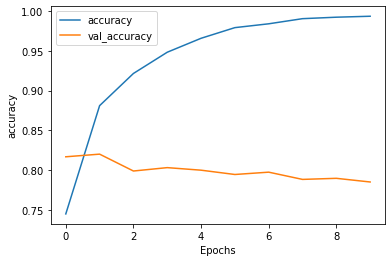

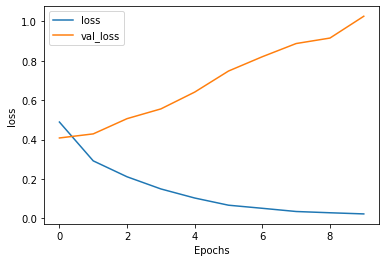

In [12]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 120, 32)           320000    
_________________________________________________________________
conv1d (Conv1D)              (None, 116, 128)          20608     
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 6)                 774       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 7         
Total params: 341,389
Trainable params: 341,389
Non-trainable params: 0
_________________________________________________________________
Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 3s 104

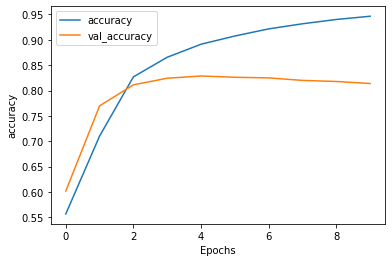

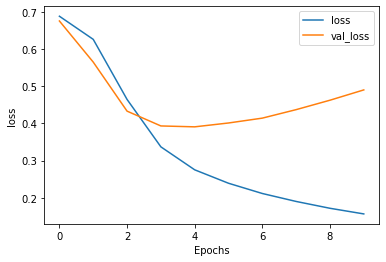

In [13]:
# Model Definition with Conv1D
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()
num_epochs = 10
history = model.fit(padded, training_label_final, epochs=num_epochs, validation_data=(testing_padded, testing_label_final),batch_size=1024)
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 120, 32)           320000    
_________________________________________________________________
bidirectional_4 (Bidirection (None, 64)                16640     
_________________________________________________________________
dense_10 (Dense)             (None, 6)                 390       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 7         
Total params: 337,037
Trainable params: 337,037
Non-trainable params: 0
_________________________________________________________________
Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 4s 177us/sample - loss: 0.6916 - accuracy: 0.5225 - val_loss: 0.6881 - val_accuracy: 0.5539
Epoch 2/10
25000/25000 [======================

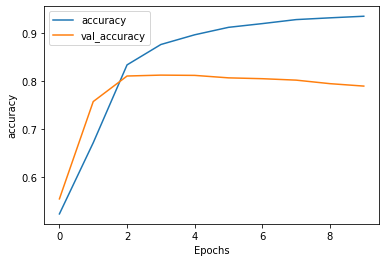

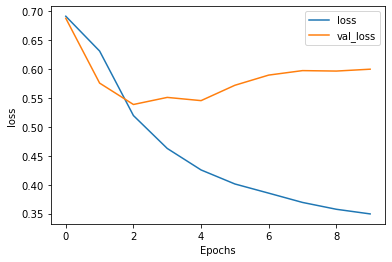

In [14]:
# Model Definition with LSTM
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()
num_epochs = 10
history = model.fit(padded, training_label_final, epochs=num_epochs, validation_data=(testing_padded, testing_label_final),batch_size=1024)
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')